In [101]:
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from tqdm import tqdm
import pandas as pd
from astropy.io import fits
from astropy.table import Table
def magnitud(Flux):
    try:
        return 27.5-2.5*np.log10(np.abs(Flux))
    except RuntimeWarning:
        return 27.5-2.5*np.log10(np.abs(Flux)+1e-8)

def magnitud_err(Flux,Flux_err):
    top = Flux + Flux_err
    bot = Flux - Flux_err
    top_mag = magnitud(top)
    bot_mag = magnitud(bot)
    return np.abs(top_mag-bot_mag)

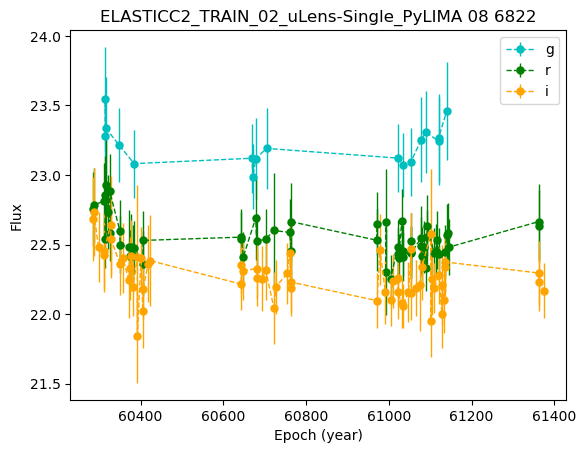

In [102]:
dataset = "ELASTICC_2"  
class_name = "ELASTICC2_TRAIN_02_uLens-Single_PyLIMA"
fit_file = "08"
lc = 2
def event_fits(dataset, class_name, fit_file, i = None, snid = None, bands = "ugrizY", plot = False):
    fits_files =[file for file in os.listdir(Path(dataset, class_name)) if file.endswith("FITS.gz")]
    pref = os.path.commonprefix(fits_files)
    head = fits.open(Path(dataset, class_name, pref+f"{fit_file}_HEAD.FITS.gz"))[1].data
    phot = fits.open(Path(dataset, class_name, pref+f"{fit_file}_PHOT.FITS.gz"))[1].data
    if i != None:
        start = head["PTROBS_MIN"][i]
        end = head["PTROBS_MAX"][i]
        snid = head["SNID"][0]
        idx = i
    elif snid != None:
        start = head[head["SNID"]==snid]["PTROBS_MIN"][0]
        end = head[head["SNID"]==snid]["PTROBS_MAX"][0]
        idx = snid
    lc = phot[start:end]
    for band in bands:
        lc_band = lc[lc["BAND"] == band]
        mjd = lc_band["MJD"]
        mag = magnitud(lc_band["FLUXCAL"])
        mag_err =  magnitud_err(lc_band["FLUXCAL"],lc_band["FLUXCALERR"])
        if plot == True:
            bands_colors = {'u':'b', 'g':'c', 'r':'g', 'i':'orange', 'z':'r', 'Y':'m'}
            plt.errorbar(mjd, mag, mag_err, color=bands_colors[band], marker='o', mew = 0.05,linestyle='--', lw = 1, label = band[0])
    if plot == True:
        plt.xlabel("Epoch (year)")
        plt.ylabel("Flux")
        plt.title(class_name+" "+fit_file+" "+str(idx))
        plt.legend()
        plt.show()
    return mjd, mag, mag_err, idx

mjd, mag, mag_err, snid = event_fits(dataset, class_name, fit_file, snid = snid, bands = "gri", plot = True)

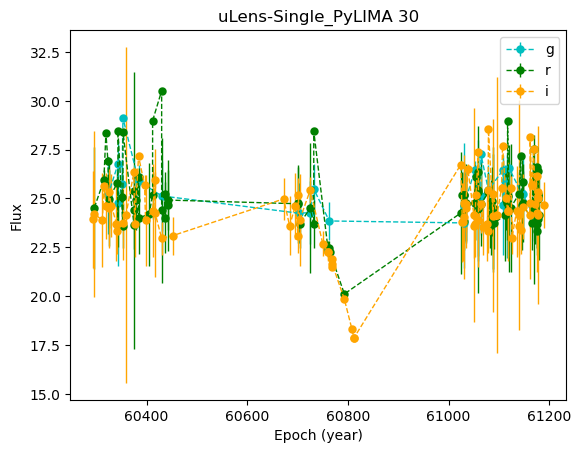

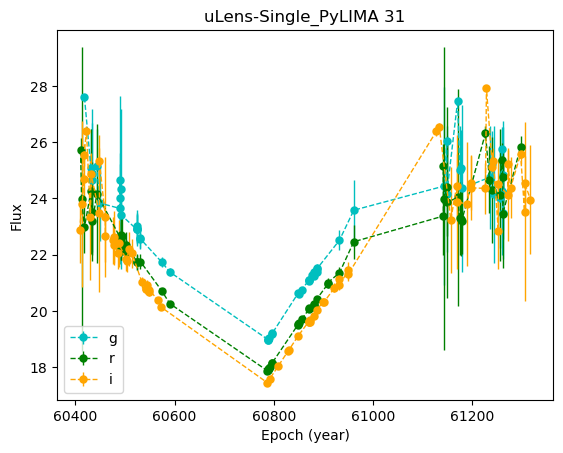

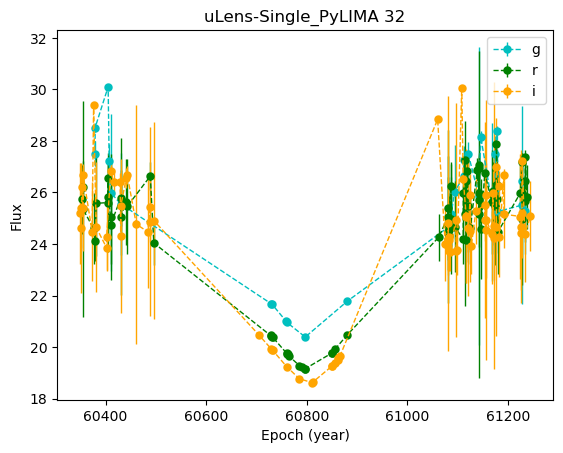

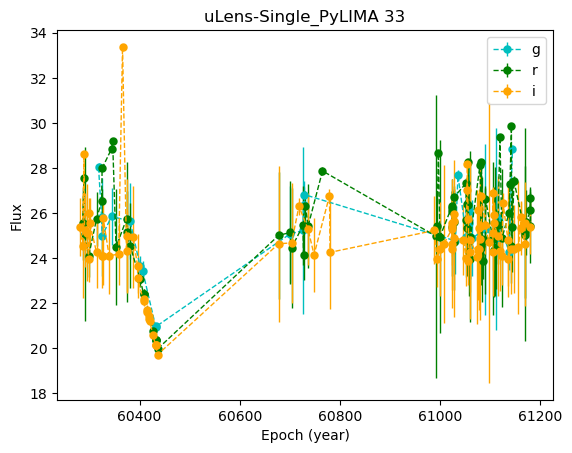

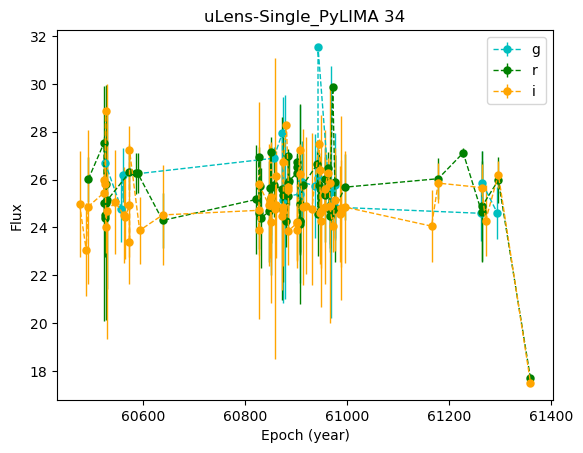

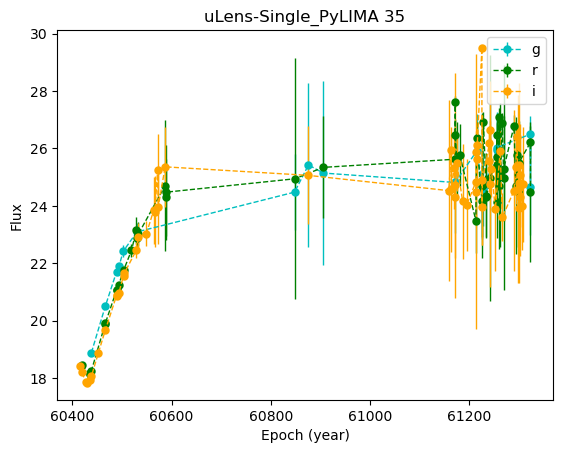

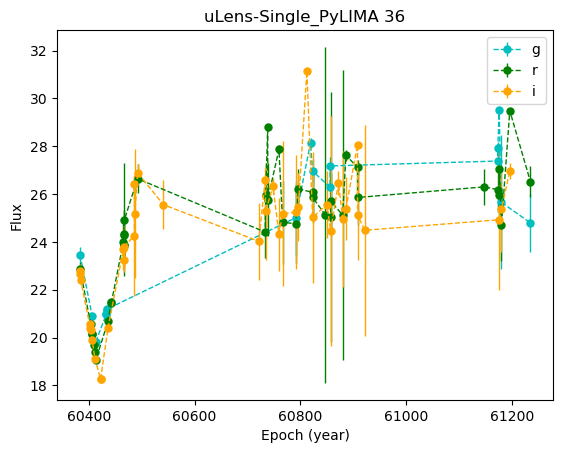

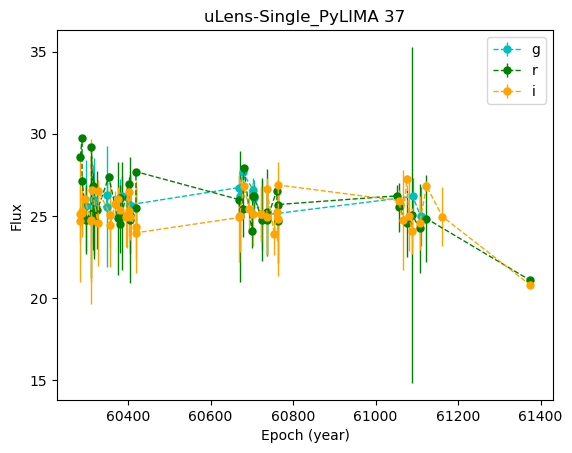

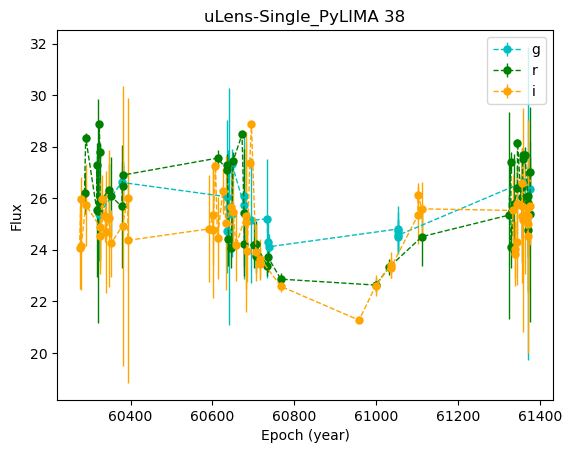

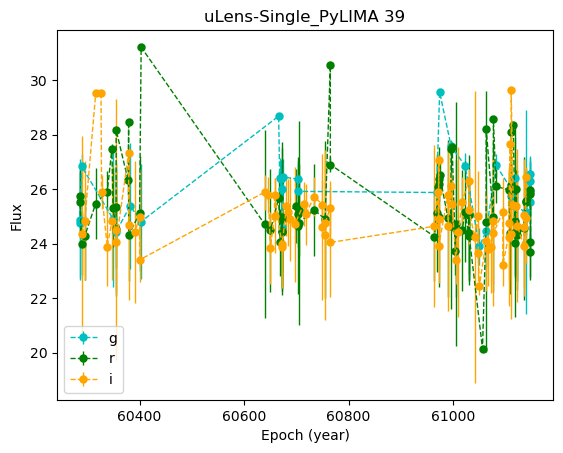

IndexError: list index out of range

In [108]:
def event_dat(dataset, class_name, i = None, snid = None, bands = "ugrizY", plot = False):
    for band in bands:
        if i != None:
            files =[file for file in os.listdir(Path(dataset+"_"+band, class_name)) if ".dat" in file]
            f = np.loadtxt(Path(dataset+"_"+band, class_name, files[i])).T
            idx = i
        elif snid != None:
            files =[file for file in os.listdir(Path(dataset+"_"+band, class_name)) if ".dat" in file]
            f = np.loadtxt(Path(dataset+"_"+band, class_name, [_ for _ in files if snid in _][0])).T
            idx = snid
        if plot == True:
            bands_colors = {'u':'b', 'g':'c', 'r':'g', 'i':'orange', 'z':'r', 'Y':'m'}
            plt.errorbar(*f, color=bands_colors[band], marker='o', mew = 0.05,linestyle='--', lw = 1, label = band[0])
    if plot == True:
        plt.xlabel("Epoch (year)")
        plt.ylabel("Flux")
        plt.title(class_name+" "+str(idx))
        plt.legend()
        plt.show()
    return mjd, mag, mag_err, idx

class_name = "uLens-Single_PyLIMA"
dataset = "ELASTICC2"
for i in range(30,60):
    event_dat(dataset, class_name, i = i, bands = "gri", plot = True)

In [143]:
len(head.SNID), len(os.listdir("ELASTICC2_i/uLens-Single_PyLIMA"))

(270, 40)

In [111]:
dataset = "ELASTICC_2"  
class_name = "ELASTICC2_TRAIN_02_uLens-Single_PyLIMA"
fit_file = "08"
lc = 2
fits_files =[file for file in os.listdir(Path(dataset, class_name)) if file.endswith("FITS.gz")]
pref = os.path.commonprefix(fits_files)
head = fits.open(Path(dataset, class_name, pref+f"{fit_file}_HEAD.FITS.gz"))[1].data
phot = fits.open(Path(dataset, class_name, pref+f"{fit_file}_PHOT.FITS.gz"))[1].data
start = head[head["SNID"]==snid]["PTROBS_MIN"][0]
end = head[head["SNID"]==snid]["PTROBS_MAX"][0]


In [140]:
# snid = "6822"
for snid in head.SNID:
    phott = phot[head.PTROBS_MIN[0]:head.PTROBS_MAX[0]]
    print(Table(phott[phott.BAND == "i"]))

   MJD     BAND CCDNUM    FIELD     ... XPIX YPIX SIM_FLUXCAL_HOSTERR SIM_MAGOBS
---------- ---- ------ ------------ ... ---- ---- ------------------- ----------
60284.3338   i      -9 VOID         ... -9.0 -9.0                 0.0  18.740717
60286.3003   i      -9 VOID         ... -9.0 -9.0                 0.0  18.741432
60298.1999   i      -9 VOID         ... -9.0 -9.0                 0.0  18.744362
60311.1789   i      -9 VOID         ... -9.0 -9.0                 0.0   18.74695
 60311.196   i      -9 VOID         ... -9.0 -9.0                 0.0  18.746952
60327.2643   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749578
60328.1625   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749725
60350.1504   i      -9 VOID         ... -9.0 -9.0                 0.0  18.752628
60357.1336   i      -9 VOID         ... -9.0 -9.0                 0.0  18.753496
 60371.019   i      -9 VOID         ... -9.0 -9.0                 0.0  18.755222
       ...  ...    ...      

   MJD     BAND CCDNUM    FIELD     ... XPIX YPIX SIM_FLUXCAL_HOSTERR SIM_MAGOBS
---------- ---- ------ ------------ ... ---- ---- ------------------- ----------
60284.3338   i      -9 VOID         ... -9.0 -9.0                 0.0  18.740717
60286.3003   i      -9 VOID         ... -9.0 -9.0                 0.0  18.741432
60298.1999   i      -9 VOID         ... -9.0 -9.0                 0.0  18.744362
60311.1789   i      -9 VOID         ... -9.0 -9.0                 0.0   18.74695
 60311.196   i      -9 VOID         ... -9.0 -9.0                 0.0  18.746952
60327.2643   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749578
60328.1625   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749725
60350.1504   i      -9 VOID         ... -9.0 -9.0                 0.0  18.752628
60357.1336   i      -9 VOID         ... -9.0 -9.0                 0.0  18.753496
 60371.019   i      -9 VOID         ... -9.0 -9.0                 0.0  18.755222
       ...  ...    ...      

   MJD     BAND CCDNUM    FIELD     ... XPIX YPIX SIM_FLUXCAL_HOSTERR SIM_MAGOBS
---------- ---- ------ ------------ ... ---- ---- ------------------- ----------
60284.3338   i      -9 VOID         ... -9.0 -9.0                 0.0  18.740717
60286.3003   i      -9 VOID         ... -9.0 -9.0                 0.0  18.741432
60298.1999   i      -9 VOID         ... -9.0 -9.0                 0.0  18.744362
60311.1789   i      -9 VOID         ... -9.0 -9.0                 0.0   18.74695
 60311.196   i      -9 VOID         ... -9.0 -9.0                 0.0  18.746952
60327.2643   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749578
60328.1625   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749725
60350.1504   i      -9 VOID         ... -9.0 -9.0                 0.0  18.752628
60357.1336   i      -9 VOID         ... -9.0 -9.0                 0.0  18.753496
 60371.019   i      -9 VOID         ... -9.0 -9.0                 0.0  18.755222
       ...  ...    ...      

   MJD     BAND CCDNUM    FIELD     ... XPIX YPIX SIM_FLUXCAL_HOSTERR SIM_MAGOBS
---------- ---- ------ ------------ ... ---- ---- ------------------- ----------
60284.3338   i      -9 VOID         ... -9.0 -9.0                 0.0  18.740717
60286.3003   i      -9 VOID         ... -9.0 -9.0                 0.0  18.741432
60298.1999   i      -9 VOID         ... -9.0 -9.0                 0.0  18.744362
60311.1789   i      -9 VOID         ... -9.0 -9.0                 0.0   18.74695
 60311.196   i      -9 VOID         ... -9.0 -9.0                 0.0  18.746952
60327.2643   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749578
60328.1625   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749725
60350.1504   i      -9 VOID         ... -9.0 -9.0                 0.0  18.752628
60357.1336   i      -9 VOID         ... -9.0 -9.0                 0.0  18.753496
 60371.019   i      -9 VOID         ... -9.0 -9.0                 0.0  18.755222
       ...  ...    ...      

   MJD     BAND CCDNUM    FIELD     ... XPIX YPIX SIM_FLUXCAL_HOSTERR SIM_MAGOBS
---------- ---- ------ ------------ ... ---- ---- ------------------- ----------
60284.3338   i      -9 VOID         ... -9.0 -9.0                 0.0  18.740717
60286.3003   i      -9 VOID         ... -9.0 -9.0                 0.0  18.741432
60298.1999   i      -9 VOID         ... -9.0 -9.0                 0.0  18.744362
60311.1789   i      -9 VOID         ... -9.0 -9.0                 0.0   18.74695
 60311.196   i      -9 VOID         ... -9.0 -9.0                 0.0  18.746952
60327.2643   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749578
60328.1625   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749725
60350.1504   i      -9 VOID         ... -9.0 -9.0                 0.0  18.752628
60357.1336   i      -9 VOID         ... -9.0 -9.0                 0.0  18.753496
 60371.019   i      -9 VOID         ... -9.0 -9.0                 0.0  18.755222
       ...  ...    ...      

   MJD     BAND CCDNUM    FIELD     ... XPIX YPIX SIM_FLUXCAL_HOSTERR SIM_MAGOBS
---------- ---- ------ ------------ ... ---- ---- ------------------- ----------
60284.3338   i      -9 VOID         ... -9.0 -9.0                 0.0  18.740717
60286.3003   i      -9 VOID         ... -9.0 -9.0                 0.0  18.741432
60298.1999   i      -9 VOID         ... -9.0 -9.0                 0.0  18.744362
60311.1789   i      -9 VOID         ... -9.0 -9.0                 0.0   18.74695
 60311.196   i      -9 VOID         ... -9.0 -9.0                 0.0  18.746952
60327.2643   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749578
60328.1625   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749725
60350.1504   i      -9 VOID         ... -9.0 -9.0                 0.0  18.752628
60357.1336   i      -9 VOID         ... -9.0 -9.0                 0.0  18.753496
 60371.019   i      -9 VOID         ... -9.0 -9.0                 0.0  18.755222
       ...  ...    ...      

   MJD     BAND CCDNUM    FIELD     ... XPIX YPIX SIM_FLUXCAL_HOSTERR SIM_MAGOBS
---------- ---- ------ ------------ ... ---- ---- ------------------- ----------
60284.3338   i      -9 VOID         ... -9.0 -9.0                 0.0  18.740717
60286.3003   i      -9 VOID         ... -9.0 -9.0                 0.0  18.741432
60298.1999   i      -9 VOID         ... -9.0 -9.0                 0.0  18.744362
60311.1789   i      -9 VOID         ... -9.0 -9.0                 0.0   18.74695
 60311.196   i      -9 VOID         ... -9.0 -9.0                 0.0  18.746952
60327.2643   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749578
60328.1625   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749725
60350.1504   i      -9 VOID         ... -9.0 -9.0                 0.0  18.752628
60357.1336   i      -9 VOID         ... -9.0 -9.0                 0.0  18.753496
 60371.019   i      -9 VOID         ... -9.0 -9.0                 0.0  18.755222
       ...  ...    ...      

   MJD     BAND CCDNUM    FIELD     ... XPIX YPIX SIM_FLUXCAL_HOSTERR SIM_MAGOBS
---------- ---- ------ ------------ ... ---- ---- ------------------- ----------
60284.3338   i      -9 VOID         ... -9.0 -9.0                 0.0  18.740717
60286.3003   i      -9 VOID         ... -9.0 -9.0                 0.0  18.741432
60298.1999   i      -9 VOID         ... -9.0 -9.0                 0.0  18.744362
60311.1789   i      -9 VOID         ... -9.0 -9.0                 0.0   18.74695
 60311.196   i      -9 VOID         ... -9.0 -9.0                 0.0  18.746952
60327.2643   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749578
60328.1625   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749725
60350.1504   i      -9 VOID         ... -9.0 -9.0                 0.0  18.752628
60357.1336   i      -9 VOID         ... -9.0 -9.0                 0.0  18.753496
 60371.019   i      -9 VOID         ... -9.0 -9.0                 0.0  18.755222
       ...  ...    ...      

   MJD     BAND CCDNUM    FIELD     ... XPIX YPIX SIM_FLUXCAL_HOSTERR SIM_MAGOBS
---------- ---- ------ ------------ ... ---- ---- ------------------- ----------
60284.3338   i      -9 VOID         ... -9.0 -9.0                 0.0  18.740717
60286.3003   i      -9 VOID         ... -9.0 -9.0                 0.0  18.741432
60298.1999   i      -9 VOID         ... -9.0 -9.0                 0.0  18.744362
60311.1789   i      -9 VOID         ... -9.0 -9.0                 0.0   18.74695
 60311.196   i      -9 VOID         ... -9.0 -9.0                 0.0  18.746952
60327.2643   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749578
60328.1625   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749725
60350.1504   i      -9 VOID         ... -9.0 -9.0                 0.0  18.752628
60357.1336   i      -9 VOID         ... -9.0 -9.0                 0.0  18.753496
 60371.019   i      -9 VOID         ... -9.0 -9.0                 0.0  18.755222
       ...  ...    ...      

   MJD     BAND CCDNUM    FIELD     ... XPIX YPIX SIM_FLUXCAL_HOSTERR SIM_MAGOBS
---------- ---- ------ ------------ ... ---- ---- ------------------- ----------
60284.3338   i      -9 VOID         ... -9.0 -9.0                 0.0  18.740717
60286.3003   i      -9 VOID         ... -9.0 -9.0                 0.0  18.741432
60298.1999   i      -9 VOID         ... -9.0 -9.0                 0.0  18.744362
60311.1789   i      -9 VOID         ... -9.0 -9.0                 0.0   18.74695
 60311.196   i      -9 VOID         ... -9.0 -9.0                 0.0  18.746952
60327.2643   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749578
60328.1625   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749725
60350.1504   i      -9 VOID         ... -9.0 -9.0                 0.0  18.752628
60357.1336   i      -9 VOID         ... -9.0 -9.0                 0.0  18.753496
 60371.019   i      -9 VOID         ... -9.0 -9.0                 0.0  18.755222
       ...  ...    ...      

   MJD     BAND CCDNUM    FIELD     ... XPIX YPIX SIM_FLUXCAL_HOSTERR SIM_MAGOBS
---------- ---- ------ ------------ ... ---- ---- ------------------- ----------
60284.3338   i      -9 VOID         ... -9.0 -9.0                 0.0  18.740717
60286.3003   i      -9 VOID         ... -9.0 -9.0                 0.0  18.741432
60298.1999   i      -9 VOID         ... -9.0 -9.0                 0.0  18.744362
60311.1789   i      -9 VOID         ... -9.0 -9.0                 0.0   18.74695
 60311.196   i      -9 VOID         ... -9.0 -9.0                 0.0  18.746952
60327.2643   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749578
60328.1625   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749725
60350.1504   i      -9 VOID         ... -9.0 -9.0                 0.0  18.752628
60357.1336   i      -9 VOID         ... -9.0 -9.0                 0.0  18.753496
 60371.019   i      -9 VOID         ... -9.0 -9.0                 0.0  18.755222
       ...  ...    ...      

   MJD     BAND CCDNUM    FIELD     ... XPIX YPIX SIM_FLUXCAL_HOSTERR SIM_MAGOBS
---------- ---- ------ ------------ ... ---- ---- ------------------- ----------
60284.3338   i      -9 VOID         ... -9.0 -9.0                 0.0  18.740717
60286.3003   i      -9 VOID         ... -9.0 -9.0                 0.0  18.741432
60298.1999   i      -9 VOID         ... -9.0 -9.0                 0.0  18.744362
60311.1789   i      -9 VOID         ... -9.0 -9.0                 0.0   18.74695
 60311.196   i      -9 VOID         ... -9.0 -9.0                 0.0  18.746952
60327.2643   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749578
60328.1625   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749725
60350.1504   i      -9 VOID         ... -9.0 -9.0                 0.0  18.752628
60357.1336   i      -9 VOID         ... -9.0 -9.0                 0.0  18.753496
 60371.019   i      -9 VOID         ... -9.0 -9.0                 0.0  18.755222
       ...  ...    ...      

   MJD     BAND CCDNUM    FIELD     ... XPIX YPIX SIM_FLUXCAL_HOSTERR SIM_MAGOBS
---------- ---- ------ ------------ ... ---- ---- ------------------- ----------
60284.3338   i      -9 VOID         ... -9.0 -9.0                 0.0  18.740717
60286.3003   i      -9 VOID         ... -9.0 -9.0                 0.0  18.741432
60298.1999   i      -9 VOID         ... -9.0 -9.0                 0.0  18.744362
60311.1789   i      -9 VOID         ... -9.0 -9.0                 0.0   18.74695
 60311.196   i      -9 VOID         ... -9.0 -9.0                 0.0  18.746952
60327.2643   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749578
60328.1625   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749725
60350.1504   i      -9 VOID         ... -9.0 -9.0                 0.0  18.752628
60357.1336   i      -9 VOID         ... -9.0 -9.0                 0.0  18.753496
 60371.019   i      -9 VOID         ... -9.0 -9.0                 0.0  18.755222
       ...  ...    ...      

   MJD     BAND CCDNUM    FIELD     ... XPIX YPIX SIM_FLUXCAL_HOSTERR SIM_MAGOBS
---------- ---- ------ ------------ ... ---- ---- ------------------- ----------
60284.3338   i      -9 VOID         ... -9.0 -9.0                 0.0  18.740717
60286.3003   i      -9 VOID         ... -9.0 -9.0                 0.0  18.741432
60298.1999   i      -9 VOID         ... -9.0 -9.0                 0.0  18.744362
60311.1789   i      -9 VOID         ... -9.0 -9.0                 0.0   18.74695
 60311.196   i      -9 VOID         ... -9.0 -9.0                 0.0  18.746952
60327.2643   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749578
60328.1625   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749725
60350.1504   i      -9 VOID         ... -9.0 -9.0                 0.0  18.752628
60357.1336   i      -9 VOID         ... -9.0 -9.0                 0.0  18.753496
 60371.019   i      -9 VOID         ... -9.0 -9.0                 0.0  18.755222
       ...  ...    ...      

   MJD     BAND CCDNUM    FIELD     ... XPIX YPIX SIM_FLUXCAL_HOSTERR SIM_MAGOBS
---------- ---- ------ ------------ ... ---- ---- ------------------- ----------
60284.3338   i      -9 VOID         ... -9.0 -9.0                 0.0  18.740717
60286.3003   i      -9 VOID         ... -9.0 -9.0                 0.0  18.741432
60298.1999   i      -9 VOID         ... -9.0 -9.0                 0.0  18.744362
60311.1789   i      -9 VOID         ... -9.0 -9.0                 0.0   18.74695
 60311.196   i      -9 VOID         ... -9.0 -9.0                 0.0  18.746952
60327.2643   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749578
60328.1625   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749725
60350.1504   i      -9 VOID         ... -9.0 -9.0                 0.0  18.752628
60357.1336   i      -9 VOID         ... -9.0 -9.0                 0.0  18.753496
 60371.019   i      -9 VOID         ... -9.0 -9.0                 0.0  18.755222
       ...  ...    ...      

   MJD     BAND CCDNUM    FIELD     ... XPIX YPIX SIM_FLUXCAL_HOSTERR SIM_MAGOBS
---------- ---- ------ ------------ ... ---- ---- ------------------- ----------
60284.3338   i      -9 VOID         ... -9.0 -9.0                 0.0  18.740717
60286.3003   i      -9 VOID         ... -9.0 -9.0                 0.0  18.741432
60298.1999   i      -9 VOID         ... -9.0 -9.0                 0.0  18.744362
60311.1789   i      -9 VOID         ... -9.0 -9.0                 0.0   18.74695
 60311.196   i      -9 VOID         ... -9.0 -9.0                 0.0  18.746952
60327.2643   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749578
60328.1625   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749725
60350.1504   i      -9 VOID         ... -9.0 -9.0                 0.0  18.752628
60357.1336   i      -9 VOID         ... -9.0 -9.0                 0.0  18.753496
 60371.019   i      -9 VOID         ... -9.0 -9.0                 0.0  18.755222
       ...  ...    ...      

   MJD     BAND CCDNUM    FIELD     ... XPIX YPIX SIM_FLUXCAL_HOSTERR SIM_MAGOBS
---------- ---- ------ ------------ ... ---- ---- ------------------- ----------
60284.3338   i      -9 VOID         ... -9.0 -9.0                 0.0  18.740717
60286.3003   i      -9 VOID         ... -9.0 -9.0                 0.0  18.741432
60298.1999   i      -9 VOID         ... -9.0 -9.0                 0.0  18.744362
60311.1789   i      -9 VOID         ... -9.0 -9.0                 0.0   18.74695
 60311.196   i      -9 VOID         ... -9.0 -9.0                 0.0  18.746952
60327.2643   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749578
60328.1625   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749725
60350.1504   i      -9 VOID         ... -9.0 -9.0                 0.0  18.752628
60357.1336   i      -9 VOID         ... -9.0 -9.0                 0.0  18.753496
 60371.019   i      -9 VOID         ... -9.0 -9.0                 0.0  18.755222
       ...  ...    ...      

   MJD     BAND CCDNUM    FIELD     ... XPIX YPIX SIM_FLUXCAL_HOSTERR SIM_MAGOBS
---------- ---- ------ ------------ ... ---- ---- ------------------- ----------
60284.3338   i      -9 VOID         ... -9.0 -9.0                 0.0  18.740717
60286.3003   i      -9 VOID         ... -9.0 -9.0                 0.0  18.741432
60298.1999   i      -9 VOID         ... -9.0 -9.0                 0.0  18.744362
60311.1789   i      -9 VOID         ... -9.0 -9.0                 0.0   18.74695
 60311.196   i      -9 VOID         ... -9.0 -9.0                 0.0  18.746952
60327.2643   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749578
60328.1625   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749725
60350.1504   i      -9 VOID         ... -9.0 -9.0                 0.0  18.752628
60357.1336   i      -9 VOID         ... -9.0 -9.0                 0.0  18.753496
 60371.019   i      -9 VOID         ... -9.0 -9.0                 0.0  18.755222
       ...  ...    ...      

   MJD     BAND CCDNUM    FIELD     ... XPIX YPIX SIM_FLUXCAL_HOSTERR SIM_MAGOBS
---------- ---- ------ ------------ ... ---- ---- ------------------- ----------
60284.3338   i      -9 VOID         ... -9.0 -9.0                 0.0  18.740717
60286.3003   i      -9 VOID         ... -9.0 -9.0                 0.0  18.741432
60298.1999   i      -9 VOID         ... -9.0 -9.0                 0.0  18.744362
60311.1789   i      -9 VOID         ... -9.0 -9.0                 0.0   18.74695
 60311.196   i      -9 VOID         ... -9.0 -9.0                 0.0  18.746952
60327.2643   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749578
60328.1625   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749725
60350.1504   i      -9 VOID         ... -9.0 -9.0                 0.0  18.752628
60357.1336   i      -9 VOID         ... -9.0 -9.0                 0.0  18.753496
 60371.019   i      -9 VOID         ... -9.0 -9.0                 0.0  18.755222
       ...  ...    ...      

   MJD     BAND CCDNUM    FIELD     ... XPIX YPIX SIM_FLUXCAL_HOSTERR SIM_MAGOBS
---------- ---- ------ ------------ ... ---- ---- ------------------- ----------
60284.3338   i      -9 VOID         ... -9.0 -9.0                 0.0  18.740717
60286.3003   i      -9 VOID         ... -9.0 -9.0                 0.0  18.741432
60298.1999   i      -9 VOID         ... -9.0 -9.0                 0.0  18.744362
60311.1789   i      -9 VOID         ... -9.0 -9.0                 0.0   18.74695
 60311.196   i      -9 VOID         ... -9.0 -9.0                 0.0  18.746952
60327.2643   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749578
60328.1625   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749725
60350.1504   i      -9 VOID         ... -9.0 -9.0                 0.0  18.752628
60357.1336   i      -9 VOID         ... -9.0 -9.0                 0.0  18.753496
 60371.019   i      -9 VOID         ... -9.0 -9.0                 0.0  18.755222
       ...  ...    ...      

   MJD     BAND CCDNUM    FIELD     ... XPIX YPIX SIM_FLUXCAL_HOSTERR SIM_MAGOBS
---------- ---- ------ ------------ ... ---- ---- ------------------- ----------
60284.3338   i      -9 VOID         ... -9.0 -9.0                 0.0  18.740717
60286.3003   i      -9 VOID         ... -9.0 -9.0                 0.0  18.741432
60298.1999   i      -9 VOID         ... -9.0 -9.0                 0.0  18.744362
60311.1789   i      -9 VOID         ... -9.0 -9.0                 0.0   18.74695
 60311.196   i      -9 VOID         ... -9.0 -9.0                 0.0  18.746952
60327.2643   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749578
60328.1625   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749725
60350.1504   i      -9 VOID         ... -9.0 -9.0                 0.0  18.752628
60357.1336   i      -9 VOID         ... -9.0 -9.0                 0.0  18.753496
 60371.019   i      -9 VOID         ... -9.0 -9.0                 0.0  18.755222
       ...  ...    ...      

   MJD     BAND CCDNUM    FIELD     ... XPIX YPIX SIM_FLUXCAL_HOSTERR SIM_MAGOBS
---------- ---- ------ ------------ ... ---- ---- ------------------- ----------
60284.3338   i      -9 VOID         ... -9.0 -9.0                 0.0  18.740717
60286.3003   i      -9 VOID         ... -9.0 -9.0                 0.0  18.741432
60298.1999   i      -9 VOID         ... -9.0 -9.0                 0.0  18.744362
60311.1789   i      -9 VOID         ... -9.0 -9.0                 0.0   18.74695
 60311.196   i      -9 VOID         ... -9.0 -9.0                 0.0  18.746952
60327.2643   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749578
60328.1625   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749725
60350.1504   i      -9 VOID         ... -9.0 -9.0                 0.0  18.752628
60357.1336   i      -9 VOID         ... -9.0 -9.0                 0.0  18.753496
 60371.019   i      -9 VOID         ... -9.0 -9.0                 0.0  18.755222
       ...  ...    ...      

   MJD     BAND CCDNUM    FIELD     ... XPIX YPIX SIM_FLUXCAL_HOSTERR SIM_MAGOBS
---------- ---- ------ ------------ ... ---- ---- ------------------- ----------
60284.3338   i      -9 VOID         ... -9.0 -9.0                 0.0  18.740717
60286.3003   i      -9 VOID         ... -9.0 -9.0                 0.0  18.741432
60298.1999   i      -9 VOID         ... -9.0 -9.0                 0.0  18.744362
60311.1789   i      -9 VOID         ... -9.0 -9.0                 0.0   18.74695
 60311.196   i      -9 VOID         ... -9.0 -9.0                 0.0  18.746952
60327.2643   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749578
60328.1625   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749725
60350.1504   i      -9 VOID         ... -9.0 -9.0                 0.0  18.752628
60357.1336   i      -9 VOID         ... -9.0 -9.0                 0.0  18.753496
 60371.019   i      -9 VOID         ... -9.0 -9.0                 0.0  18.755222
       ...  ...    ...      

   MJD     BAND CCDNUM    FIELD     ... XPIX YPIX SIM_FLUXCAL_HOSTERR SIM_MAGOBS
---------- ---- ------ ------------ ... ---- ---- ------------------- ----------
60284.3338   i      -9 VOID         ... -9.0 -9.0                 0.0  18.740717
60286.3003   i      -9 VOID         ... -9.0 -9.0                 0.0  18.741432
60298.1999   i      -9 VOID         ... -9.0 -9.0                 0.0  18.744362
60311.1789   i      -9 VOID         ... -9.0 -9.0                 0.0   18.74695
 60311.196   i      -9 VOID         ... -9.0 -9.0                 0.0  18.746952
60327.2643   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749578
60328.1625   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749725
60350.1504   i      -9 VOID         ... -9.0 -9.0                 0.0  18.752628
60357.1336   i      -9 VOID         ... -9.0 -9.0                 0.0  18.753496
 60371.019   i      -9 VOID         ... -9.0 -9.0                 0.0  18.755222
       ...  ...    ...      

   MJD     BAND CCDNUM    FIELD     ... XPIX YPIX SIM_FLUXCAL_HOSTERR SIM_MAGOBS
---------- ---- ------ ------------ ... ---- ---- ------------------- ----------
60284.3338   i      -9 VOID         ... -9.0 -9.0                 0.0  18.740717
60286.3003   i      -9 VOID         ... -9.0 -9.0                 0.0  18.741432
60298.1999   i      -9 VOID         ... -9.0 -9.0                 0.0  18.744362
60311.1789   i      -9 VOID         ... -9.0 -9.0                 0.0   18.74695
 60311.196   i      -9 VOID         ... -9.0 -9.0                 0.0  18.746952
60327.2643   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749578
60328.1625   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749725
60350.1504   i      -9 VOID         ... -9.0 -9.0                 0.0  18.752628
60357.1336   i      -9 VOID         ... -9.0 -9.0                 0.0  18.753496
 60371.019   i      -9 VOID         ... -9.0 -9.0                 0.0  18.755222
       ...  ...    ...      

   MJD     BAND CCDNUM    FIELD     ... XPIX YPIX SIM_FLUXCAL_HOSTERR SIM_MAGOBS
---------- ---- ------ ------------ ... ---- ---- ------------------- ----------
60284.3338   i      -9 VOID         ... -9.0 -9.0                 0.0  18.740717
60286.3003   i      -9 VOID         ... -9.0 -9.0                 0.0  18.741432
60298.1999   i      -9 VOID         ... -9.0 -9.0                 0.0  18.744362
60311.1789   i      -9 VOID         ... -9.0 -9.0                 0.0   18.74695
 60311.196   i      -9 VOID         ... -9.0 -9.0                 0.0  18.746952
60327.2643   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749578
60328.1625   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749725
60350.1504   i      -9 VOID         ... -9.0 -9.0                 0.0  18.752628
60357.1336   i      -9 VOID         ... -9.0 -9.0                 0.0  18.753496
 60371.019   i      -9 VOID         ... -9.0 -9.0                 0.0  18.755222
       ...  ...    ...      

   MJD     BAND CCDNUM    FIELD     ... XPIX YPIX SIM_FLUXCAL_HOSTERR SIM_MAGOBS
---------- ---- ------ ------------ ... ---- ---- ------------------- ----------
60284.3338   i      -9 VOID         ... -9.0 -9.0                 0.0  18.740717
60286.3003   i      -9 VOID         ... -9.0 -9.0                 0.0  18.741432
60298.1999   i      -9 VOID         ... -9.0 -9.0                 0.0  18.744362
60311.1789   i      -9 VOID         ... -9.0 -9.0                 0.0   18.74695
 60311.196   i      -9 VOID         ... -9.0 -9.0                 0.0  18.746952
60327.2643   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749578
60328.1625   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749725
60350.1504   i      -9 VOID         ... -9.0 -9.0                 0.0  18.752628
60357.1336   i      -9 VOID         ... -9.0 -9.0                 0.0  18.753496
 60371.019   i      -9 VOID         ... -9.0 -9.0                 0.0  18.755222
       ...  ...    ...      

   MJD     BAND CCDNUM    FIELD     ... XPIX YPIX SIM_FLUXCAL_HOSTERR SIM_MAGOBS
---------- ---- ------ ------------ ... ---- ---- ------------------- ----------
60284.3338   i      -9 VOID         ... -9.0 -9.0                 0.0  18.740717
60286.3003   i      -9 VOID         ... -9.0 -9.0                 0.0  18.741432
60298.1999   i      -9 VOID         ... -9.0 -9.0                 0.0  18.744362
60311.1789   i      -9 VOID         ... -9.0 -9.0                 0.0   18.74695
 60311.196   i      -9 VOID         ... -9.0 -9.0                 0.0  18.746952
60327.2643   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749578
60328.1625   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749725
60350.1504   i      -9 VOID         ... -9.0 -9.0                 0.0  18.752628
60357.1336   i      -9 VOID         ... -9.0 -9.0                 0.0  18.753496
 60371.019   i      -9 VOID         ... -9.0 -9.0                 0.0  18.755222
       ...  ...    ...      

   MJD     BAND CCDNUM    FIELD     ... XPIX YPIX SIM_FLUXCAL_HOSTERR SIM_MAGOBS
---------- ---- ------ ------------ ... ---- ---- ------------------- ----------
60284.3338   i      -9 VOID         ... -9.0 -9.0                 0.0  18.740717
60286.3003   i      -9 VOID         ... -9.0 -9.0                 0.0  18.741432
60298.1999   i      -9 VOID         ... -9.0 -9.0                 0.0  18.744362
60311.1789   i      -9 VOID         ... -9.0 -9.0                 0.0   18.74695
 60311.196   i      -9 VOID         ... -9.0 -9.0                 0.0  18.746952
60327.2643   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749578
60328.1625   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749725
60350.1504   i      -9 VOID         ... -9.0 -9.0                 0.0  18.752628
60357.1336   i      -9 VOID         ... -9.0 -9.0                 0.0  18.753496
 60371.019   i      -9 VOID         ... -9.0 -9.0                 0.0  18.755222
       ...  ...    ...      

   MJD     BAND CCDNUM    FIELD     ... XPIX YPIX SIM_FLUXCAL_HOSTERR SIM_MAGOBS
---------- ---- ------ ------------ ... ---- ---- ------------------- ----------
60284.3338   i      -9 VOID         ... -9.0 -9.0                 0.0  18.740717
60286.3003   i      -9 VOID         ... -9.0 -9.0                 0.0  18.741432
60298.1999   i      -9 VOID         ... -9.0 -9.0                 0.0  18.744362
60311.1789   i      -9 VOID         ... -9.0 -9.0                 0.0   18.74695
 60311.196   i      -9 VOID         ... -9.0 -9.0                 0.0  18.746952
60327.2643   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749578
60328.1625   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749725
60350.1504   i      -9 VOID         ... -9.0 -9.0                 0.0  18.752628
60357.1336   i      -9 VOID         ... -9.0 -9.0                 0.0  18.753496
 60371.019   i      -9 VOID         ... -9.0 -9.0                 0.0  18.755222
       ...  ...    ...      

   MJD     BAND CCDNUM    FIELD     ... XPIX YPIX SIM_FLUXCAL_HOSTERR SIM_MAGOBS
---------- ---- ------ ------------ ... ---- ---- ------------------- ----------
60284.3338   i      -9 VOID         ... -9.0 -9.0                 0.0  18.740717
60286.3003   i      -9 VOID         ... -9.0 -9.0                 0.0  18.741432
60298.1999   i      -9 VOID         ... -9.0 -9.0                 0.0  18.744362
60311.1789   i      -9 VOID         ... -9.0 -9.0                 0.0   18.74695
 60311.196   i      -9 VOID         ... -9.0 -9.0                 0.0  18.746952
60327.2643   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749578
60328.1625   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749725
60350.1504   i      -9 VOID         ... -9.0 -9.0                 0.0  18.752628
60357.1336   i      -9 VOID         ... -9.0 -9.0                 0.0  18.753496
 60371.019   i      -9 VOID         ... -9.0 -9.0                 0.0  18.755222
       ...  ...    ...      

   MJD     BAND CCDNUM    FIELD     ... XPIX YPIX SIM_FLUXCAL_HOSTERR SIM_MAGOBS
---------- ---- ------ ------------ ... ---- ---- ------------------- ----------
60284.3338   i      -9 VOID         ... -9.0 -9.0                 0.0  18.740717
60286.3003   i      -9 VOID         ... -9.0 -9.0                 0.0  18.741432
60298.1999   i      -9 VOID         ... -9.0 -9.0                 0.0  18.744362
60311.1789   i      -9 VOID         ... -9.0 -9.0                 0.0   18.74695
 60311.196   i      -9 VOID         ... -9.0 -9.0                 0.0  18.746952
60327.2643   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749578
60328.1625   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749725
60350.1504   i      -9 VOID         ... -9.0 -9.0                 0.0  18.752628
60357.1336   i      -9 VOID         ... -9.0 -9.0                 0.0  18.753496
 60371.019   i      -9 VOID         ... -9.0 -9.0                 0.0  18.755222
       ...  ...    ...      

   MJD     BAND CCDNUM    FIELD     ... XPIX YPIX SIM_FLUXCAL_HOSTERR SIM_MAGOBS
---------- ---- ------ ------------ ... ---- ---- ------------------- ----------
60284.3338   i      -9 VOID         ... -9.0 -9.0                 0.0  18.740717
60286.3003   i      -9 VOID         ... -9.0 -9.0                 0.0  18.741432
60298.1999   i      -9 VOID         ... -9.0 -9.0                 0.0  18.744362
60311.1789   i      -9 VOID         ... -9.0 -9.0                 0.0   18.74695
 60311.196   i      -9 VOID         ... -9.0 -9.0                 0.0  18.746952
60327.2643   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749578
60328.1625   i      -9 VOID         ... -9.0 -9.0                 0.0  18.749725
60350.1504   i      -9 VOID         ... -9.0 -9.0                 0.0  18.752628
60357.1336   i      -9 VOID         ... -9.0 -9.0                 0.0  18.753496
 60371.019   i      -9 VOID         ... -9.0 -9.0                 0.0  18.755222
       ...  ...    ...      

In [139]:
have_band = []
for snid in head.SNID:
    event = phot[head.PTROBS_MIN[0]:head.PTROBS_MAX[0]]
    have_band.append(len(event[phot.BAND == "i"])!= 0)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 278 but corresponding boolean dimension is 68697

In [131]:
sum(have_band), len(head.SNID)

(270, 270)